## Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# use only pandas in this part, except if we tell you to use other

# Software Defect Prediction dataset. 
# This is a data set made publicly available in order to encourage improvable predictive models
# of software engineering.
# created by NASA, and donated in December 2004. 

# your dataset was generated from a deep learning model trained on Software Defect Prediction dataset.
# and is currently under compition in this kaggle forum: 
    # https://www.kaggle.com/competitions/playground-series-s3e23/
# so if you got good results don't forget to participate in the competition


# In this dataset you have 21 features for a software, 
# based on which you predict whether it will be defective or not. 
# so the problem is a binary classification: is this software defective or not?
# the last colmn "defects" is either True or False. True meaning defective.

# your task is to build and train a logetsic regression model to predict the probability of which
# a software (sample) is defective.

# downlaod train and test datasets.


In [3]:
data =pd.read_csv('synthetic_software_defect.csv', index_col='id')
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False


In [4]:
# how many samples do u have?
data.shape
# are your features all numerical?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [5]:
# which 2 features have more correlation with the target column = defects?
data.corr()
# branchCount
# loc

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.761509,0.544569,0.696327,0.759605,0.758069,-0.388018,0.599474,0.486427,0.501281,...,0.803460,0.528029,0.670751,0.246244,0.367068,0.637582,0.764612,0.761662,0.762755,0.342642
v(g),0.761509,1.000000,0.729249,0.790553,0.631041,0.618267,-0.387270,0.574305,0.304531,0.430184,...,0.641835,0.379520,0.461759,0.208324,0.389917,0.532358,0.639125,0.606453,0.966702,0.301187
ev(g),0.544569,0.729249,1.000000,0.545255,0.390504,0.367697,-0.325488,0.357735,0.160594,0.275179,...,0.382541,0.292689,0.282293,0.164563,0.200460,0.279100,0.394963,0.372867,0.774752,0.259928
iv(g),0.696327,0.790553,0.545255,1.000000,0.589718,0.585134,-0.291631,0.487112,0.319971,0.394291,...,0.636895,0.337728,0.426030,0.178546,0.378869,0.550633,0.591597,0.567097,0.747870,0.245618
n,0.759605,0.631041,0.390504,0.589718,1.000000,0.928390,-0.300350,0.808291,0.725408,0.569544,...,0.911761,0.566374,0.775345,0.262916,0.618021,0.818994,0.963373,0.953080,0.626009,0.258080
v,0.758069,0.618267,0.367697,0.585134,0.928390,1.000000,-0.254087,0.748121,0.673386,0.582332,...,0.899258,0.531985,0.735278,0.242057,0.544283,0.798964,0.936446,0.942189,0.608678,0.231179
l,-0.388018,-0.387270,-0.325488,-0.291631,-0.300350,-0.254087,1.000000,-0.426309,-0.162300,-0.091764,...,-0.289713,-0.187982,-0.288838,-0.125480,-0.399440,-0.283644,-0.294469,-0.290559,-0.416185,-0.253237
d,0.599474,0.574305,0.357735,0.487112,0.808291,0.748121,-0.426309,1.000000,0.515402,0.471276,...,0.778856,0.486619,0.676297,0.268184,0.782781,0.690652,0.808275,0.784738,0.575155,0.241936
i,0.486427,0.304531,0.160594,0.319971,0.725408,0.673386,-0.162300,0.515402,1.000000,0.286149,...,0.677093,0.435828,0.654349,0.214151,0.527640,0.803330,0.702058,0.740201,0.313935,0.208577
e,0.501281,0.430184,0.275179,0.394291,0.569544,0.582332,-0.091764,0.471276,0.286149,1.000000,...,0.580089,0.328993,0.436276,0.124604,0.275824,0.414846,0.579018,0.566986,0.427110,0.095366


In [6]:
# pick those 2 features and the target colummn and drop the rest of the features of yuor data
data = data[['loc', 'branchCount', 'defects']]

# drop duplicates
data_no_dup =data.drop_duplicates()

print(
data.shape,
data_no_dup.shape
)

# what percent of your sample were uplicates? wow 92
((101763-8078)/101763)*100

# use the new dataset from now on
data = data_no_dup

(101763, 3) (8078, 3)


hi


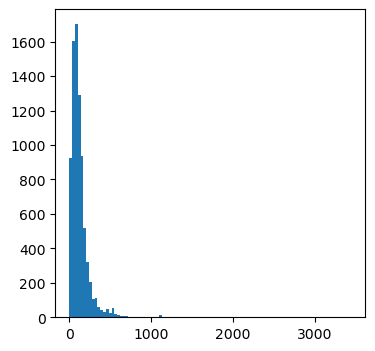

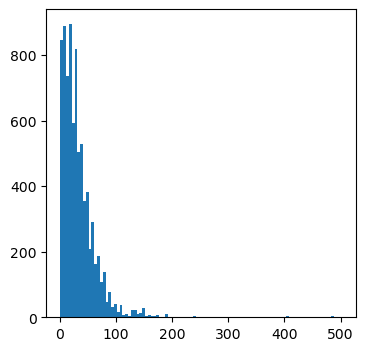

In [7]:
# plot the distribution for both of your chosen features. use plt.hist() with 1000 bins.
plt.figure(figsize=(4,4))
plt.hist(data['loc'], bins=100)

plt.figure(figsize=(4,4))
plt.hist(data['branchCount'], bins=100)

# what common disribution does these features have? what is it called?
# exponensial
print('hi')

hi


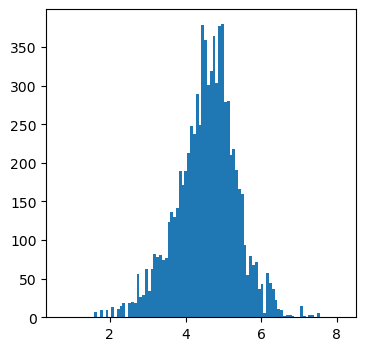

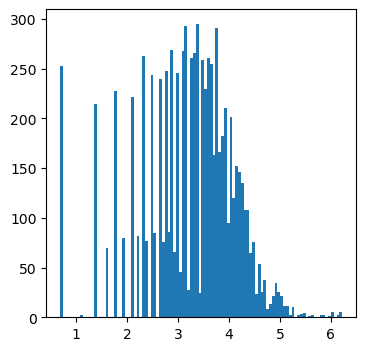

In [8]:
# your logestic regression model will profit if you transform the data.
#  use np.log1p to log-transform your your selected features. 
# whats the differnce between np.log1p() and np.log()?
# plot the hist of your log-transformed data again. whats the differnce?

data[['branchCount', 'loc']]=data[['branchCount', 'loc']].apply(np.log1p)

plt.figure(figsize=(4,4))
plt.hist(data['loc'], bins=100)

plt.figure(figsize=(4,4))
plt.hist(data['branchCount'], bins=100)

print('hi')

In [9]:
data.iloc[0:11]

,loc,branchCount,defects
id,,,
0,3.135494,1.791759,False
1,2.708050,1.386294,False
2,2.484907,1.386294,False
3,2.197225,0.693147,True
5,3.178054,2.079442,False
6,3.218876,2.079442,False
7,2.708050,0.693147,False
8,3.555348,2.995732,False
9,2.302585,1.386294,False


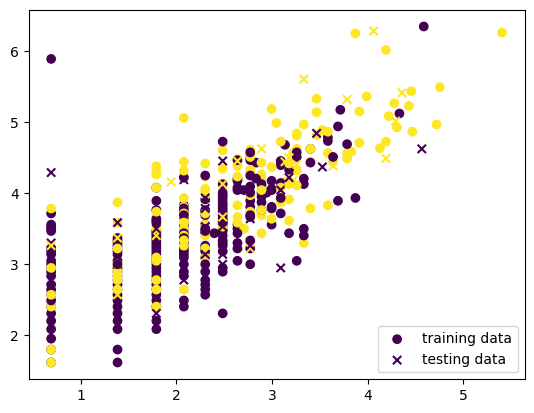

In [10]:
# now before creating your logestic regresion model,
# use the log-transform of your 2 selected colmns as features (X)
# and the last column "defects" as target (y)
# only select rows [500:1000] of both your features and targets for train
# and rows [1000:1100] of both your features and targets for test 

# do a scatter plot where xaxis is one feature and yaxis is the second one. use y to indicate color
# u can use this code:
a=0
b=350
c=350
d=400

X_train = data[['branchCount','loc']].iloc[a:b]
y_train = data.defects.iloc[a:b]
X_test = data[['branchCount','loc']].iloc[c:d]
y_test = data.defects.iloc[c:d]

plt.scatter(X_train.branchCount, X_train['loc'], c=y_train, label='training data')
plt.scatter(X_test.branchCount, X_test['loc'], c=y_test, marker='x', label='testing data')
plt.legend()

## Creating our model: logestic regression

In [11]:
type(X_train)

pandas.core.frame.DataFrame

we want our data code seperate from our modeling code

In [12]:
# before beginig the modeling transfrom your pandas df to numpy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

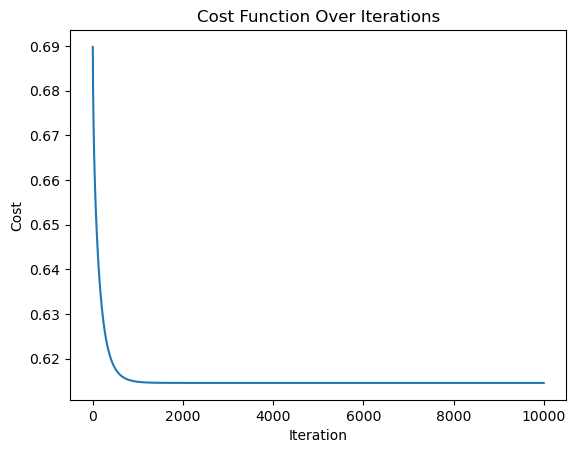

In [13]:
# Add a bias term to the features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize parameters
theta = np.zeros(X_train_bias.shape[1])
learning_rate = 0.001
num_iterations = 10000

# Function to compute the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute the logistic regression cost
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = -1/m * (y.dot(np.log(h + epsilon)) + (1 - y).dot(np.log(1 - h + epsilon)))
    return cost

# Lists to store cost values for plotting
cost_history = []

# Gradient Ascent
for i in range(num_iterations):
    h = sigmoid(X_train_bias.dot(theta))
    gradient = X_train_bias.T.dot(y_train - h)
    theta += learning_rate * gradient
    cost = compute_cost(X_train_bias, y_train, theta)
    cost_history.append(cost)

# Plot cost function over iterations
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()



## Validating our model

In [14]:

# Predictions on training and test data
train_predictions = sigmoid(X_train_bias.dot(theta))
test_predictions = sigmoid(X_test_bias.dot(theta))

# Threshold the probabilities to get class labels
train_predictions_class = (train_predictions >= 0.5).astype(int)
test_predictions_class = (test_predictions >= 0.5).astype(int)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions_class)
test_accuracy = accuracy_score(y_test, test_predictions_class)

# Calculate training and testing errors
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, test_predictions)

# Equation of the decision boundary (y = ax + b)
a = -theta[1] / theta[2]
b = -theta[0] / theta[2]

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
# print(f"Training Error: {train_error:.2f}")
# print(f"Testing Error: {test_error:.2f}")
print(f"Decision Boundary: y = {a:.2f}x + {b:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Training Accuracy: 0.70
Testing Accuracy: 0.70
Decision Boundary: y = -0.08x + 4.39
ROC AUC Score: 0.75


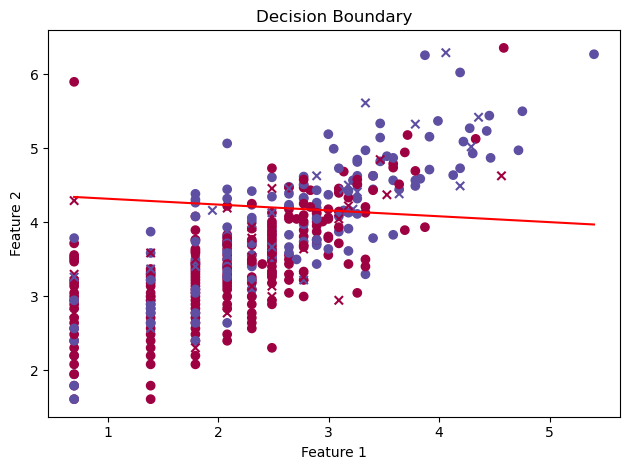

In [15]:
# Plot decision boundary along with data points

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral, marker='x')
x_boundary = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
y_boundary = a * x_boundary + b
plt.plot(x_boundary, y_boundary, 'r-')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")

# Show the plot
plt.tight_layout()